In [27]:
import tensorflow as tf
import numpy as np
import unicodedata
import re


import matplotlib.pyplot as plt

raw_data = (
    ('What a ridiculous concept!', 'Quel concept ridicule !'),
    ('Your idea is not entirely crazy.', "Votre idée n'est pas complètement folle."),
    ("A man's worth lies in what he is.", "La valeur d'un homme réside dans ce qu'il est."),
    ('What he did is very wrong.', "Ce qu'il a fait est très mal."),
    ("All three of you need to do that.", "Vous avez besoin de faire cela, tous les trois."),
    ("Are you giving me another chance?", "Me donnez-vous une autre chance ?"),
    ("Both Tom and Mary work as models.", "Tom et Mary travaillent tous les deux comme mannequins."),
    ("Can I have a few minutes, please?", "Puis-je avoir quelques minutes, je vous prie ?"),
    ("Could you close the door, please?", "Pourriez-vous fermer la porte, s'il vous plaît ?"),
    ("Did you plant pumpkins this year?", "Cette année, avez-vous planté des citrouilles ?"),
    ("Do you ever study in the library?", "Est-ce que vous étudiez à la bibliothèque des fois ?"),
    ("Don't be deceived by appearances.", "Ne vous laissez pas abuser par les apparences."),
    ("Excuse me. Can you speak English?", "Je vous prie de m'excuser ! Savez-vous parler anglais ?"),
    ("Few people know the true meaning.", "Peu de gens savent ce que cela veut réellement dire."),
    ("Germany produced many scientists.", "L'Allemagne a produit beaucoup de scientifiques."),
    ("Guess whose birthday it is today.", "Devine de qui c'est l'anniversaire, aujourd'hui !"),
    ("He acted like he owned the place.", "Il s'est comporté comme s'il possédait l'endroit."),
    ("Honesty will pay in the long run.", "L'honnêteté paye à la longue."),
    ("How do we know this isn't a trap?", "Comment savez-vous qu'il ne s'agit pas d'un piège ?"),
    ("I can't believe you're giving up.", "Je n'arrive pas à croire que vous abandonniez."),
)

Data cleaning

In [3]:
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def normalize_string(s):
    s = unicode_to_ascii(s)
    s = re.sub(r'([!.?])', r' \1', s)
    s = re.sub(r'[^a-zA-Z.!?]+', r' ', s)
    s = re.sub(r'\s+', r' ', s)
    return s

In [4]:
raw_data_en, raw_data_fr = list(zip(*raw_data))
raw_data_en, raw_data_fr = list(raw_data_en), list(raw_data_fr)

In [5]:
raw_data_en = [normalize_string(data) for data in raw_data_en]

In [6]:
raw_data_fr_in = ['<start> ' + normalize_string(data) for data in raw_data_fr]

In [7]:
raw_data_fr_out = [normalize_string(data) + ' <end>' for data in raw_data_fr]

In [8]:
raw_data_en

['What a ridiculous concept !',
 'Your idea is not entirely crazy .',
 'A man s worth lies in what he is .',
 'What he did is very wrong .',
 'All three of you need to do that .',
 'Are you giving me another chance ?',
 'Both Tom and Mary work as models .',
 'Can I have a few minutes please ?',
 'Could you close the door please ?',
 'Did you plant pumpkins this year ?',
 'Do you ever study in the library ?',
 'Don t be deceived by appearances .',
 'Excuse me . Can you speak English ?',
 'Few people know the true meaning .',
 'Germany produced many scientists .',
 'Guess whose birthday it is today .',
 'He acted like he owned the place .',
 'Honesty will pay in the long run .',
 'How do we know this isn t a trap ?',
 'I can t believe you re giving up .']

In [9]:
raw_data_fr_out

['Quel concept ridicule ! <end>',
 'Votre idee n est pas completement folle . <end>',
 'La valeur d un homme reside dans ce qu il est . <end>',
 'Ce qu il a fait est tres mal . <end>',
 'Vous avez besoin de faire cela tous les trois . <end>',
 'Me donnez vous une autre chance ? <end>',
 'Tom et Mary travaillent tous les deux comme mannequins . <end>',
 'Puis je avoir quelques minutes je vous prie ? <end>',
 'Pourriez vous fermer la porte s il vous plait ? <end>',
 'Cette annee avez vous plante des citrouilles ? <end>',
 'Est ce que vous etudiez a la bibliotheque des fois ? <end>',
 'Ne vous laissez pas abuser par les apparences . <end>',
 'Je vous prie de m excuser ! Savez vous parler anglais ? <end>',
 'Peu de gens savent ce que cela veut reellement dire . <end>',
 'L Allemagne a produit beaucoup de scientifiques . <end>',
 'Devine de qui c est l anniversaire aujourd hui ! <end>',
 'Il s est comporte comme s il possedait l endroit . <end>',
 'L honnetete paye a la longue . <end>',
 'C

Now tokenize the data

In [10]:
en_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
# Careful, by default filters strips out ?.!

In [11]:
en_tokenizer.fit_on_texts(raw_data_en)

In [12]:
print(en_tokenizer.word_index)

{'.': 1, 'you': 2, '?': 3, 'the': 4, 'a': 5, 'is': 6, 'he': 7, 'what': 8, 'in': 9, 'do': 10, 'can': 11, 't': 12, 'did': 13, 'giving': 14, 'me': 15, 'i': 16, 'few': 17, 'please': 18, 'this': 19, 'know': 20, 'ridiculous': 21, 'concept': 22, '!': 23, 'your': 24, 'idea': 25, 'not': 26, 'entirely': 27, 'crazy': 28, 'man': 29, 's': 30, 'worth': 31, 'lies': 32, 'very': 33, 'wrong': 34, 'all': 35, 'three': 36, 'of': 37, 'need': 38, 'to': 39, 'that': 40, 'are': 41, 'another': 42, 'chance': 43, 'both': 44, 'tom': 45, 'and': 46, 'mary': 47, 'work': 48, 'as': 49, 'models': 50, 'have': 51, 'minutes': 52, 'could': 53, 'close': 54, 'door': 55, 'plant': 56, 'pumpkins': 57, 'year': 58, 'ever': 59, 'study': 60, 'library': 61, 'don': 62, 'be': 63, 'deceived': 64, 'by': 65, 'appearances': 66, 'excuse': 67, 'speak': 68, 'english': 69, 'people': 70, 'true': 71, 'meaning': 72, 'germany': 73, 'produced': 74, 'many': 75, 'scientists': 76, 'guess': 77, 'whose': 78, 'birthday': 79, 'it': 80, 'today': 81, 'acted'

In [13]:
data_en = en_tokenizer.texts_to_sequences(raw_data_en)

In [14]:
data_en

[[8, 5, 21, 22, 23],
 [24, 25, 6, 26, 27, 28, 1],
 [5, 29, 30, 31, 32, 9, 8, 7, 6, 1],
 [8, 7, 13, 6, 33, 34, 1],
 [35, 36, 37, 2, 38, 39, 10, 40, 1],
 [41, 2, 14, 15, 42, 43, 3],
 [44, 45, 46, 47, 48, 49, 50, 1],
 [11, 16, 51, 5, 17, 52, 18, 3],
 [53, 2, 54, 4, 55, 18, 3],
 [13, 2, 56, 57, 19, 58, 3],
 [10, 2, 59, 60, 9, 4, 61, 3],
 [62, 12, 63, 64, 65, 66, 1],
 [67, 15, 1, 11, 2, 68, 69, 3],
 [17, 70, 20, 4, 71, 72, 1],
 [73, 74, 75, 76, 1],
 [77, 78, 79, 80, 6, 81, 1],
 [7, 82, 83, 7, 84, 4, 85, 1],
 [86, 87, 88, 9, 4, 89, 90, 1],
 [91, 10, 92, 20, 19, 93, 12, 5, 94, 3],
 [16, 11, 12, 95, 2, 96, 14, 97, 1]]

In [15]:
data_en = tf.keras.preprocessing.sequence.pad_sequences(data_en,
                                                        padding='post')
# Need to pad all the sequences to the same final length

In [16]:
data_en

array([[ 8,  5, 21, 22, 23,  0,  0,  0,  0,  0],
       [24, 25,  6, 26, 27, 28,  1,  0,  0,  0],
       [ 5, 29, 30, 31, 32,  9,  8,  7,  6,  1],
       [ 8,  7, 13,  6, 33, 34,  1,  0,  0,  0],
       [35, 36, 37,  2, 38, 39, 10, 40,  1,  0],
       [41,  2, 14, 15, 42, 43,  3,  0,  0,  0],
       [44, 45, 46, 47, 48, 49, 50,  1,  0,  0],
       [11, 16, 51,  5, 17, 52, 18,  3,  0,  0],
       [53,  2, 54,  4, 55, 18,  3,  0,  0,  0],
       [13,  2, 56, 57, 19, 58,  3,  0,  0,  0],
       [10,  2, 59, 60,  9,  4, 61,  3,  0,  0],
       [62, 12, 63, 64, 65, 66,  1,  0,  0,  0],
       [67, 15,  1, 11,  2, 68, 69,  3,  0,  0],
       [17, 70, 20,  4, 71, 72,  1,  0,  0,  0],
       [73, 74, 75, 76,  1,  0,  0,  0,  0,  0],
       [77, 78, 79, 80,  6, 81,  1,  0,  0,  0],
       [ 7, 82, 83,  7, 84,  4, 85,  1,  0,  0],
       [86, 87, 88,  9,  4, 89, 90,  1,  0,  0],
       [91, 10, 92, 20, 19, 93, 12,  5, 94,  3],
       [16, 11, 12, 95,  2, 96, 14, 97,  1,  0]], dtype=int32)

In [17]:
# Have to fit on both texts so we get all the tokens
fr_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
fr_tokenizer.fit_on_texts(raw_data_fr_in)
fr_tokenizer.fit_on_texts(raw_data_fr_out) # Update with different corpora

print(fr_tokenizer.word_index)

{'vous': 1, '.': 2, '<start>': 3, '<end>': 4, '?': 5, 'est': 6, 'il': 7, 'a': 8, 'de': 9, 'pas': 10, 'la': 11, 'ce': 12, 'je': 13, 's': 14, 'l': 15, '!': 16, 'qu': 17, 'les': 18, 'que': 19, 'n': 20, 'd': 21, 'un': 22, 'avez': 23, 'cela': 24, 'tous': 25, 'comme': 26, 'prie': 27, 'des': 28, 'ne': 29, 'savez': 30, 'quel': 31, 'concept': 32, 'ridicule': 33, 'votre': 34, 'idee': 35, 'completement': 36, 'folle': 37, 'valeur': 38, 'homme': 39, 'reside': 40, 'dans': 41, 'fait': 42, 'tres': 43, 'mal': 44, 'besoin': 45, 'faire': 46, 'trois': 47, 'me': 48, 'donnez': 49, 'une': 50, 'autre': 51, 'chance': 52, 'tom': 53, 'et': 54, 'mary': 55, 'travaillent': 56, 'deux': 57, 'mannequins': 58, 'puis': 59, 'avoir': 60, 'quelques': 61, 'minutes': 62, 'pourriez': 63, 'fermer': 64, 'porte': 65, 'plait': 66, 'cette': 67, 'annee': 68, 'plante': 69, 'citrouilles': 70, 'etudiez': 71, 'bibliotheque': 72, 'fois': 73, 'laissez': 74, 'abuser': 75, 'par': 76, 'apparences': 77, 'm': 78, 'excuser': 79, 'parler': 80, 

In [18]:
# Translate and pad both data sets
data_fr_in = fr_tokenizer.texts_to_sequences(raw_data_fr_in)
data_fr_in = tf.keras.preprocessing.sequence.pad_sequences(data_fr_in,
                                                           padding='post')

data_fr_out = fr_tokenizer.texts_to_sequences(raw_data_fr_out)
data_fr_out = tf.keras.preprocessing.sequence.pad_sequences(data_fr_out,
                                                           padding='post')



In [19]:
data_fr_in[:3, :]

array([[ 3, 31, 32, 33, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 34, 35, 20,  6, 10, 36, 37,  2,  0,  0,  0,  0,  0],
       [ 3, 11, 38, 21, 22, 39, 40, 41, 12, 17,  7,  6,  2,  0]],
      dtype=int32)

In [20]:
data_fr_out[:3, :]

array([[31, 32, 33, 16,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [34, 35, 20,  6, 10, 36, 37,  2,  4,  0,  0,  0,  0,  0],
       [11, 38, 21, 22, 39, 40, 41, 12, 17,  7,  6,  2,  4,  0]],
      dtype=int32)

In [21]:
# Now create a data set object

dataset = tf.data.Dataset.from_tensor_slices(
    (data_en, data_fr_in, data_fr_out))
dataset = dataset.shuffle(20).batch(5)

In [22]:
print(dataset)

<BatchDataset shapes: ((None, 10), (None, 14), (None, 14)), types: (tf.int32, tf.int32, tf.int32)>


First model, no attention

In [33]:
# Encoder model
# Has an embedding layer, and then a set of states
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size: int, embedding_size: int, lstm_size: int):
        super(Encoder, self).__init__()
        self.lstm_size = lstm_size
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        
        # Layers
        # Embedd a vocab in a smaller embedding space
        self.embedding = tf.keras.layers.Embedding(
            vocab_size, embedding_size)
        # Stateful layer, generate both outputs and internal states
        self.lstm = tf.keras.layers.LSTM(
            lstm_size, return_sequences=True, return_state=True)
        
    def call(self, sequence, state):
        """ Call for a single step, output as single step """
        # Input -> embedding
        embed = self.embedding(sequence)
        # Embedding -> LSTM
        output, state_h, state_c = self.lstm(embed, initial_state=state)
        # Next stage of LSTM + output
        return output, state_h, state_c
    
    def init_states(self, batch_size: int):
        """ Initial states for a batch
        
        Set the hidden state and the output state to all 0s
        """
        return (tf.zeros([batch_size, self.lstm_size]),
                tf.zeros([batch_size, self.lstm_size]))

In [34]:
# Decoder model
# Takes the output from the encoder and writes out the final word
class Decoder(tf.keras.Model):
    
    def __init__(self, vocab_size: int, embedding_size: int, lstm_size: int):
        super(Decoder, self).__init__()
        self.lstm_size = lstm_size
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        
        # Layers
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.lstm = tf.keras.layers.LSTM(
            lstm_size, return_sequences=True, return_state=True)
        # New layer, map output of the lstm back onto the original vocab
        self.dense = tf.keras.layers.Dense(vocab_size)
    
    def call(self, sequence, state):
        embed = self.embedding(sequence)
        lstm_out, state_h, state_c = self.lstm(embed, state)
        logits = self.dense(lstm_out)
        return logits, state_h, state_c

In [36]:
# Generate a model and check for typos

EMBEDDING_SIZE = 32
LSTM_SIZE = 64

en_vocab_size = len(en_tokenizer.word_index) + 1
encoder = Encoder(en_vocab_size, EMBEDDING_SIZE, LSTM_SIZE)

fr_vocab_size = len(fr_tokenizer.word_index) + 1
decoder = Decoder(fr_vocab_size, EMBEDDING_SIZE, LSTM_SIZE)

source_input = tf.constant([[1, 3, 5, 7, 2, 0, 0, 0]])
initial_state = encoder.init_states(1)

encoder_output, en_state_h, en_state_c = encoder(source_input, initial_state)

target_input = tf.constant([[1, 4, 6, 9, 2, 0, 0]])
decoder_output, de_state_h, de_state_c = decoder(target_input, (en_state_h, en_state_c))

print('Source vocab size', en_vocab_size)
print('Source sequences', source_input.shape)
print('Encoder outputs', encoder_output.shape)
print('Encoder state_h', en_state_h.shape)
print('Encoder state_c', en_state_c.shape)

print('')

print('Destination vocab size', fr_vocab_size)
print('Destination sequences', target_input.shape)
print('Decoder outputs', decoder_output.shape)
print('Decoder state_h', de_state_h.shape)
print('Decoder state_c', de_state_c.shape)

Source vocab size 98
Source sequences (1, 8)
Encoder outputs (1, 8, 64)
Encoder state_h (1, 64)
Encoder state_c (1, 64)

Destination vocab size 110
Destination sequences (1, 7)
Decoder outputs (1, 7, 110)
Decoder state_h (1, 64)
Decoder state_c (1, 64)


loss function

In [51]:
def loss_func(targets, logits):
    """ cross entropy ignoring the padding """
    crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True)
    mask = tf.math.logical_not(tf.math.equal(targets, 0))
    mask = tf.cast(mask, dtype=tf.int64)
    loss = crossentropy(targets, logits, sample_weight=mask)
    return loss

In [52]:
optimizer = tf.keras.optimizers.Adam()

In [53]:
# Training step
@tf.function
def train_step(source_seq, target_seq_in, target_seq_out, en_initial_states):
    # Record all the operations in the forward pass
    with tf.GradientTape() as tape:
        en_outputs = encoder(source_seq, en_initial_states)
        en_states = en_outputs[1:]
        de_states = en_states
        
        de_outputs = decoder(target_seq_in, de_states)
        logits = de_outputs[0]
        loss = loss_func(target_seq_out, logits)
    
    # Work out the gradients automagically
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    
    # Optimize
    optimizer.apply_gradients(zip(gradients, variables))
    return loss

In [60]:
# Prediction step
def predict(test_source_text=None):
    """ Predict on the source sequence only """
    if test_source_text is None:
        test_source_text = raw_data_en[np.random.choice(len(raw_data_en))]
    elif isinstance(test_source_text, int):
        test_source_text = raw_data_en[test_source_text]
    print(test_source_text)
    test_source_seq = en_tokenizer.texts_to_sequences([test_source_text])
    print(test_source_seq)
    
    # Initialize the encoder and generate the forward state
    en_initial_states = encoder.init_states(1)
    en_outputs = encoder(tf.constant(test_source_seq), en_initial_states)
    
    # Now, feed in the decoder state one token at a time
    de_input = tf.constant([[fr_tokenizer.word_index['<start>']]])
    de_state_h, de_state_c = en_outputs[1:]
    out_words = []
    
    # Now run until we emit a stop token, or make waaaay too long a word
    while True:
        de_output, de_state_h, de_state_c = decoder(
            de_input, (de_state_h, de_state_c))
        # Take the single strongest token as our prediction
        de_input = tf.argmax(de_output, -1)
        out_words.append(fr_tokenizer.index_word[de_input.numpy()[0][0]])
        
        if out_words[-1] == '<end>' or len(out_words) >= 20:
            break
    print(' '.join(out_words))
        

In [62]:
# Predict some nonsense from the uninitialized net
predict()

Are you giving me another chance ?
[[41, 2, 14, 15, 42, 43, 3]]
vous laissez pas abuser par les apparences . <end>


Training loop

In [56]:
NUM_EPOCHS = 250
BATCH_SIZE = 5

for epoch in range(NUM_EPOCHS):
    en_initial_states = encoder.init_states(BATCH_SIZE)
    for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
        loss = train_step(source_seq, target_seq_in, target_seq_out, en_initial_states)
    print(f'Epoch {epoch+1} Loss {loss.numpy():.4f}')
    
    try:
        predict()
    except Exception:
        continue

Epoch 1 Loss 3.4899
Guess whose birthday it is today .
[[77, 78, 79, 80, 6, 81, 1]]
vous vous vous vous vous vous vous vous vous vous vous vous vous vous vous vous vous vous vous vous
Epoch 2 Loss 3.4828
I can t believe you re giving up .
[[16, 11, 12, 95, 2, 96, 14, 97, 1]]
vous vous vous vous vous <end>
Epoch 3 Loss 3.4723
What a ridiculous concept !
[[8, 5, 21, 22, 23]]
vous vous vous <end>
Epoch 4 Loss 3.7911
All three of you need to do that .
[[35, 36, 37, 2, 38, 39, 10, 40, 1]]
vous vous vous <end>
Epoch 5 Loss 3.7680
Can I have a few minutes please ?
[[11, 16, 51, 5, 17, 52, 18, 3]]
vous vous vous <end>
Epoch 6 Loss 3.5645
Could you close the door please ?
[[53, 2, 54, 4, 55, 18, 3]]
vous vous <end>
Epoch 7 Loss 3.6770
What a ridiculous concept !
[[8, 5, 21, 22, 23]]
vous vous <end>
Epoch 8 Loss 3.0384
Excuse me . Can you speak English ?
[[67, 15, 1, 11, 2, 68, 69, 3]]
vous vous <end>
Epoch 9 Loss 2.8536
Excuse me . Can you speak English ?
[[67, 15, 1, 11, 2, 68, 69, 3]]
vous vo

vous vous vous de m vous cela cela ? <end>
Epoch 73 Loss 1.1705
Excuse me . Can you speak English ?
[[67, 15, 1, 11, 2, 68, 69, 3]]
vous vous de la la cela parler ? <end>
Epoch 74 Loss 1.7016
Do you ever study in the library ?
[[10, 2, 59, 60, 9, 4, 61, 3]]
ce vous de la la la vous ? <end>
Epoch 75 Loss 1.4755
He acted like he owned the place .
[[7, 82, 83, 7, 84, 4, 85, 1]]
vous de la la ! <end>
Epoch 76 Loss 1.1734
What he did is very wrong .
[[8, 7, 13, 6, 33, 34, 1]]
il est est ! . <end>
Epoch 77 Loss 1.2609
Could you close the door please ?
[[53, 2, 54, 4, 55, 18, 3]]
vous vous la la la ? <end>
Epoch 78 Loss 1.5419
I can t believe you re giving up .
[[16, 11, 12, 95, 2, 96, 14, 97, 1]]
je je de de de cela cela ! ! <end>
Epoch 79 Loss 1.3579
He acted like he owned the place .
[[7, 82, 83, 7, 84, 4, 85, 1]]
ce vous a la la . <end>
Epoch 80 Loss 1.4456
Excuse me . Can you speak English ?
[[67, 15, 1, 11, 2, 68, 69, 3]]
vous vous de m excuser cela ! vous ? <end>
Epoch 81 Loss 1.2113
I

et tous les . <end>
Epoch 141 Loss 0.3396
How do we know this isn t a trap ?
[[91, 10, 92, 20, 19, 93, 12, 5, 94, 3]]
comment vous prie prie de excuser ! savez vous parler ? <end>
Epoch 142 Loss 0.4019
Did you plant pumpkins this year ?
[[13, 2, 56, 57, 19, 58, 3]]
cette avez vous plante des ? <end>
Epoch 143 Loss 0.4165
He acted like he owned the place .
[[7, 82, 83, 7, 84, 4, 85, 1]]
il est comporte comme s possedait l endroit . <end>
Epoch 144 Loss 0.4748
How do we know this isn t a trap ?
[[91, 10, 92, 20, 19, 93, 12, 5, 94, 3]]
comment savez vous qu il ne s agit pas d un piege ? <end>
Epoch 145 Loss 0.3719
I can t believe you re giving up .
[[16, 11, 12, 95, 2, 96, 14, 97, 1]]
je n arrive pas a croire que vous abandonniez . <end>
Epoch 146 Loss 0.4459
A man s worth lies in what he is .
[[5, 29, 30, 31, 32, 9, 8, 7, 6, 1]]
la valeur d un homme reside dans ce qu il est . <end>
Epoch 147 Loss 0.4704
How do we know this isn t a trap ?
[[91, 10, 92, 20, 19, 93, 12, 5, 94, 3]]
je vous p

Epoch 204 Loss 0.1620
Guess whose birthday it is today .
[[77, 78, 79, 80, 6, 81, 1]]
devine de qui est anniversaire aujourd hui ! <end>
Epoch 205 Loss 0.1727
How do we know this isn t a trap ?
[[91, 10, 92, 20, 19, 93, 12, 5, 94, 3]]
comment savez vous qu il ne s agit pas d un piege ? <end>
Epoch 206 Loss 0.1546
A man s worth lies in what he is .
[[5, 29, 30, 31, 32, 9, 8, 7, 6, 1]]
la valeur d un homme reside dans ce qu il est . <end>
Epoch 207 Loss 0.2058
I can t believe you re giving up .
[[16, 11, 12, 95, 2, 96, 14, 97, 1]]
je n arrive pas a croire que vous abandonniez . <end>
Epoch 208 Loss 0.1948
Excuse me . Can you speak English ?
[[67, 15, 1, 11, 2, 68, 69, 3]]
je vous prie de m excuser ! savez vous parler anglais ? <end>
Epoch 209 Loss 0.2002
Did you plant pumpkins this year ?
[[13, 2, 56, 57, 19, 58, 3]]
cette avez vous plante des citrouilles ? <end>
Epoch 210 Loss 0.1686
Honesty will pay in the long run .
[[86, 87, 88, 9, 4, 89, 90, 1]]
l honnetete paye a longue . <end>
Epo

## Now with attention

* Alignment vector: probability of the word within the sequence. They tell the decoder what to focus on at each step
* Context vector: Weighted average of the encoder output. Dot product of the alignment vector and the encoder output

In [57]:
# Luong style general attention
class LuongAttention(tf.keras.Model):
    def __init__(self, rnn_size):
        super(LuongAttention, self).__init__()
        # h_t @ W @ h_s - aka a Dense layer
        self.wa = tf.keras.layers.Dense(rnn_size)
    
    def call(self, decoder_output, encoder_output):
        """ Dot product between encoder and decoder output """
        # h_t dot Wa dot h_s
        score = tf.matmul(decoder_output, self.wa(encoder_output), transpose_b=True)
        # Alignment vector
        alignment = tf.nn.softmax(score, axis=2)
        
        # Context vector c_t average sum of encoder output
        context = tf.matmul(alignment, encoder_output)
        return context, alignment

In [58]:
# Need to rework the decoder
class Decoder(tf.keras.Model):
    
    def __init__(self, vocab_size, embedding_size, rnn_size):
        super(Decoder, self).__init__()
        
        self.rnn_size = rnn_size
        
        # Attention
        self.attention = LuongAttention(rnn_size)
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.lstm = tf.keras.layers.LSTM(
            rnn_size, return_sequences=True, return_state=True)
        
        # Now we need to composite the attention with the LSTM output
        self.wc = tf.keras.layers.Dense(rnn_size, activation='tanh')
        
        # Then one more to map back to vocab space
        self.ws = tf.keras.layers.Dense(vocab_size)
    
    def call(self, sequence, state, encoder_output):
        """ We now call the decoder one token at a time """
        # Output is (batch_size, 1)
        embed = self.embedding(sequence)
        
        # So the lstm has output shape (batch_size, 1, rnn_size)
        lstm_out, state_h, state_c = self.lstm(embed, initial_state=state)
        
        # Apply attention. Mix the encoder output with the decoder output
        context, alignment = self.attention(lstm_out, encoder_output)
        
        # Now we stack the vectors together
        lstm_out = tf.concat([tf.squeeze(context, 1), tf.squeeze(lstm_out, 1)], 1)
        
        # Map back into the target space
        lstm_out = self.wc(lstm_out)
        
        # Map back into vocab space
        logits = self.ws(lstm_out)
        return logits, state_h, state_c, alignment

New training loop, so we manually unroll the decoder now

In [69]:
@tf.function
def train_step(source_seq, target_seq_in, target_seq_out, en_initial_states):
    """ normal training with unrolled decoder """
    loss = 0
    with tf.GradientTape() as tape:
        en_outputs = encoder(source_seq, en_initial_states)
        en_states = en_outputs[1:]
        de_state_h, de_state_c = en_states
        
        # Loop through the target sequence
        for i in range(target_seq_out.shape[1]):
            # Need to expand to insert a batch
            decoder_in = tf.expand_dims(target_seq_in[:, i], 1)
            
            # Now decode one step at a time, with the whole input as context
            logit, de_state_h, de_state_c, _ = decoder(
                decoder_in, (de_state_h, de_state_c), en_outputs[0])
            
            # Accumulate the loss
            loss += loss_func(target_seq_out[:, i], logit)
    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    return loss / target_seq_out.shape[1]

In [70]:
# Prediction step
def predict(test_source_text=None):
    """ Predict on the source sequence only """
    if test_source_text is None:
        test_source_text = raw_data_en[np.random.choice(len(raw_data_en))]
    elif isinstance(test_source_text, int):
        test_source_text = raw_data_en[test_source_text]
    print(test_source_text)
    
    test_source_seq = en_tokenizer.texts_to_sequences([test_source_text])
    print(test_source_seq)
    
    en_initial_states = encoder.init_states(1)
    en_outputs = encoder(tf.constant(test_source_seq), en_initial_states)
    
    # Initialize the decoder
    de_input = tf.constant([[fr_tokenizer.word_index['<start>']]])
    de_state_h, de_state_c = en_outputs[1:]
    
    out_words = []
    alignments = []
    while True:
        de_output, de_state_h, de_state_c, alignment = decoder(
            de_input, (de_state_h, de_state_c), en_outputs[0]
        )
        # Again, feed back in the single best prediction
        de_input = tf.expand_dims(tf.argmax(de_output, -1), 0)
        out_words.append(fr_tokenizer.index_word[de_input.numpy()[0][0]])
        
        alignments.append(alignment.numpy())
        
        if out_words[-1] == '<end>' or len(out_words) >= 20:
            break
    print(' '.join(out_words))
    return np.array(alignments), test_source_text.split(' '), out_words

Model generation is the same

In [71]:
# Generate a model and check for typos

EMBEDDING_SIZE = 32
LSTM_SIZE = 64

en_vocab_size = len(en_tokenizer.word_index) + 1
encoder = Encoder(en_vocab_size, EMBEDDING_SIZE, LSTM_SIZE)

fr_vocab_size = len(fr_tokenizer.word_index) + 1
decoder = Decoder(fr_vocab_size, EMBEDDING_SIZE, LSTM_SIZE)

In [66]:
source_input = tf.constant([[1, 3, 5, 7, 2, 0, 0, 0]])
initial_state = encoder.init_states(1)

encoder_output, en_state_h, en_state_c = encoder(source_input, initial_state)

target_input = tf.constant([[1, 4, 6, 9, 2, 0, 0]])
decoder_output, de_state_h, de_state_c = decoder(target_input, (en_state_h, en_state_c), encoder_output)

print('Source vocab size', en_vocab_size)
print('Source sequences', source_input.shape)
print('Encoder outputs', encoder_output.shape)
print('Encoder state_h', en_state_h.shape)
print('Encoder state_c', en_state_c.shape)

print('')

print('Destination vocab size', fr_vocab_size)
print('Destination sequences', target_input.shape)
print('Decoder outputs', decoder_output.shape)
print('Decoder state_h', de_state_h.shape)
print('Decoder state_c', de_state_c.shape)

InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 7 [Op:Squeeze]

Training loop is the same

In [72]:
NUM_EPOCHS = 250
BATCH_SIZE = 5

for epoch in range(NUM_EPOCHS):
    en_initial_states = encoder.init_states(BATCH_SIZE)
    for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
        loss = train_step(source_seq, target_seq_in, target_seq_out, en_initial_states)
    print(f'Epoch {epoch+1} Loss {loss.numpy():.4f}')
    
    try:
        predict()
    except Exception:
        continue

Epoch 1 Loss 3.4737
Did you plant pumpkins this year ?
[[13, 2, 56, 57, 19, 58, 3]]
vous vous <end>
Epoch 2 Loss 3.1208
Both Tom and Mary work as models .
[[44, 45, 46, 47, 48, 49, 50, 1]]
vous <end>
Epoch 3 Loss 3.4079
All three of you need to do that .
[[35, 36, 37, 2, 38, 39, 10, 40, 1]]
vous vous vous <end>
Epoch 4 Loss 3.2025
Are you giving me another chance ?
[[41, 2, 14, 15, 42, 43, 3]]
vous vous vous <end>
Epoch 5 Loss 2.9852
I can t believe you re giving up .
[[16, 11, 12, 95, 2, 96, 14, 97, 1]]
vous vous vous vous <end>
Epoch 6 Loss 2.9520
What he did is very wrong .
[[8, 7, 13, 6, 33, 34, 1]]
vous vous vous vous vous <end>
Epoch 7 Loss 3.1494
Your idea is not entirely crazy .
[[24, 25, 6, 26, 27, 28, 1]]
vous vous vous vous vous vous <end>
Epoch 8 Loss 2.7399
How do we know this isn t a trap ?
[[91, 10, 92, 20, 19, 93, 12, 5, 94, 3]]
vous vous vous vous vous vous <end>
Epoch 9 Loss 2.9917
All three of you need to do that .
[[35, 36, 37, 2, 38, 39, 10, 40, 1]]
vous vous vous 

je vous prie de m excuser ! savez vous parler anglais ? <end>
Epoch 67 Loss 0.2171
Your idea is not entirely crazy .
[[24, 25, 6, 26, 27, 28, 1]]
votre idee n est pas completement <end>
Epoch 68 Loss 0.1732
Could you close the door please ?
[[53, 2, 54, 4, 55, 18, 3]]
je vous m m excuser ! savez vous parler anglais ? <end>
Epoch 69 Loss 0.1421
Can I have a few minutes please ?
[[11, 16, 51, 5, 17, 52, 18, 3]]
puis je avoir quelques minutes je vous prie ? <end>
Epoch 70 Loss 0.1683
Germany produced many scientists .
[[73, 74, 75, 76, 1]]
allemagne produit beaucoup de scientifiques . <end>
Epoch 71 Loss 0.1563
A man s worth lies in what he is .
[[5, 29, 30, 31, 32, 9, 8, 7, 6, 1]]
la valeur d un homme reside dans ce qu il est . <end>
Epoch 72 Loss 0.1847
Both Tom and Mary work as models .
[[44, 45, 46, 47, 48, 49, 50, 1]]
tom et mary travaillent tous les deux comme mannequins . <end>
Epoch 73 Loss 0.1728
Germany produced many scientists .
[[73, 74, 75, 76, 1]]
allemagne produit beaucoup 

Epoch 129 Loss 0.0446
Your idea is not entirely crazy .
[[24, 25, 6, 26, 27, 28, 1]]
votre idee n est pas completement <end>
Epoch 130 Loss 0.0409
Both Tom and Mary work as models .
[[44, 45, 46, 47, 48, 49, 50, 1]]
tom et mary travaillent tous les deux comme mannequins . <end>
Epoch 131 Loss 0.0421
Few people know the true meaning .
[[17, 70, 20, 4, 71, 72, 1]]
peu de savent ce que cela veut reellement . <end>
Epoch 132 Loss 0.0385
Honesty will pay in the long run .
[[86, 87, 88, 9, 4, 89, 90, 1]]
l honnetete paye a la . <end>
Epoch 133 Loss 0.0490
Do you ever study in the library ?
[[10, 2, 59, 60, 9, 4, 61, 3]]
est ce que vous etudiez a la bibliotheque des fois ? <end>
Epoch 134 Loss 0.0317
Germany produced many scientists .
[[73, 74, 75, 76, 1]]
allemagne a beaucoup de scientifiques . <end>
Epoch 135 Loss 0.0378
Don t be deceived by appearances .
[[62, 12, 63, 64, 65, 66, 1]]
ne vous laissez pas abuser les apparences . <end>
Epoch 136 Loss 0.0316
I can t believe you re giving up .


je vous prie de m excuser ! savez vous parler anglais ? <end>
Epoch 193 Loss 0.0207
Your idea is not entirely crazy .
[[24, 25, 6, 26, 27, 28, 1]]
votre idee n est pas mal . <end>
Epoch 194 Loss 0.0176
Your idea is not entirely crazy .
[[24, 25, 6, 26, 27, 28, 1]]
votre idee n est pas mal . <end>
Epoch 195 Loss 0.0177
He acted like he owned the place .
[[7, 82, 83, 7, 84, 4, 85, 1]]
il s est comporte comme s il l endroit . <end>
Epoch 196 Loss 0.0197
Did you plant pumpkins this year ?
[[13, 2, 56, 57, 19, 58, 3]]
cette annee avez vous plante des citrouilles ? <end>
Epoch 197 Loss 0.0217
Honesty will pay in the long run .
[[86, 87, 88, 9, 4, 89, 90, 1]]
l honnetete paye a la . <end>
Epoch 198 Loss 0.0199
What he did is very wrong .
[[8, 7, 13, 6, 33, 34, 1]]
ce qu il est tres mal . <end>
Epoch 199 Loss 0.0167
Both Tom and Mary work as models .
[[44, 45, 46, 47, 48, 49, 50, 1]]
tom et mary travaillent tous les deux comme mannequins . <end>
Epoch 200 Loss 0.0221
What he did is very wrong 

In [ ]:
# Plot the attention effect

inputs = []
outputs = []
attention = []
for i in range(len(raw_data_en)):
    alignment, source, target = predict(i)
    inputs.append(source)
    outputs.append(target)
    attention.append(alignment)

In [73]:
print(inputs[0])
print(outputs[0])
print(attention[0])

What a ridiculous concept !
[[8, 5, 21, 22, 23]]
quel concept ! <end>
Your idea is not entirely crazy .
[[24, 25, 6, 26, 27, 28, 1]]
votre idee n est pas mal . <end>
A man s worth lies in what he is .
[[5, 29, 30, 31, 32, 9, 8, 7, 6, 1]]
la valeur d un homme reside dans ce qu il est . <end>
What he did is very wrong .
[[8, 7, 13, 6, 33, 34, 1]]
ce qu il est tres mal . <end>
All three of you need to do that .
[[35, 36, 37, 2, 38, 39, 10, 40, 1]]
vous besoin besoin de faire cela tous les trois . <end>
Are you giving me another chance ?
[[41, 2, 14, 15, 42, 43, 3]]
me donnez vous une autre chance ? <end>
Both Tom and Mary work as models .
[[44, 45, 46, 47, 48, 49, 50, 1]]
tom et mary travaillent tous les deux comme mannequins . <end>
Can I have a few minutes please ?
[[11, 16, 51, 5, 17, 52, 18, 3]]
puis je avoir quelques minutes je vous prie ? <end>
Could you close the door please ?
[[53, 2, 54, 4, 55, 18, 3]]
je vous prie la s il vous . <end>
Did you plant pumpkins this year ?
[[13, 2, 

(11, 1, 1, 9)
9
11


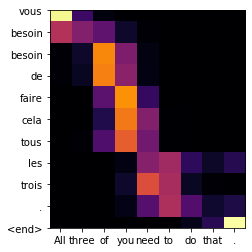

In [89]:
i = 4
print(attention[i].shape)
print(len(inputs[i]))
print(len(outputs[i]))

fig, ax = plt.subplots(1, 1)
ax.imshow(np.flipud(attention[i].squeeze()), cmap='inferno')
ax.set_yticks(list(range(len(outputs[i]))))
ax.set_yticklabels(outputs[i])
ax.set_xticks(list(range(len(inputs[i]))))
ax.set_xticklabels(inputs[i], )

plt.show()

## Transformer

Switch out sequence LSTM with an attention embedding


In [129]:
def positional_embedding(pos: int, model_size: int,
                         exponent: float = 10000):
    """ Embed a sequence and get a position feature """
    embedding = np.zeros((1, model_size))
    for i in range(model_size):
        if i % 2 == 0:
            embedding[:, i] = np.sin(pos / exponent**(i / model_size))
        else:
            embedding[:, i] = np.cos(pos / exponent**((i-1) / model_size))
    return embedding

max_length = max(len(data_en[0]), len(data_fr_in[0]))
MODEL_SIZE = 128

pes = []
for i in range(max_length):
    pes.append(positional_embedding(i, MODEL_SIZE))
pes = np.concatenate(pes, axis=0)
pes = tf.constant(pes, dtype=tf.float32)

So this function creates sine curves of increasing wavelength that represent the position along the sequence.

It's easier to see with a shorter wavelength and a longer sequence

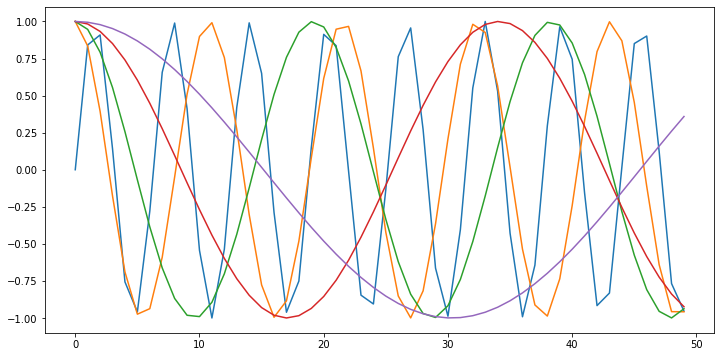

In [133]:
block_pes = []
for i in range(50):
    block_pes.append(positional_embedding(i, 128, exponent=10))
block_pes = np.concatenate(block_pes, axis=0)

pe1 = block_pes[:, [0, 31, 63, 95, 127]]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(np.arange(pe1.shape[0]), pe1);

In [60]:
!pip install scipy

  Using cached https://files.pythonhosted.org/packages/d5/06/1a696649f4b2e706c509cb9333fdc6331fbe71251cede945f9e1fa13ea34/scipy-1.3.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
